## Modeling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import initializers
from tensorflow.keras import optimizers


from sklearn.metrics import classification_report
import seaborn as sn

In [2]:
train = np.loadtxt('numerical_classification/train.csv')
trainLabel = np.loadtxt('numerical_classification/trainLabel.csv').astype(int)
test = np.loadtxt('numerical_classification/test.csv')
testLabel = np.loadtxt('numerical_classification/testLabel.csv').astype(int)
print(train.shape)
np.random.seed(7)
np.random.shuffle(train)
np.random.seed(7)
np.random.shuffle(trainLabel)
np.random.seed(7)
np.random.shuffle(test)
np.random.seed(7)
np.random.shuffle(testLabel)


(3529, 8)


In [398]:
#dataset=pd.DataFrame(train)
#dataset=dataset.iloc[:,3:]
#dataset

In [399]:
#train=np.array(dataset)

In [423]:
 
#normal_init = initializers.TruncatedNormal(mean=0,stddev=1)
# Initialising the ANN
model = keras.Sequential()
model.add(keras.Input(shape=(8,)))
# Adding the input layer and the first hidden layer
model.add(keras.layers.Dense(units = 8,  activation = 'relu'
))



# Adding the output layer
model.add(keras.layers.Dense(units = 1, activation = 'sigmoid')) #Pour la fonction de sortie 
#il faut  faire attention


# Compiling the ANN
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=optimizers.Adam(
    learning_rate=0.0001,name='adam'))
 
# Fitting the ANN to the Training set
#model.fit(train, trainLabel, batch_size =4, epochs = 50, verbose=2)
cHist = model.fit(train, trainLabel, validation_split=0.2,  batch_size =32, epochs = 100, verbose=2)





In [ ]:
# Fitting the ANN to the Training set
#model.fit(train, trainLabel, batch_size =4, epochs = 50, verbose=2)
cHist = model.fit(train, trainLabel, validation_split=0.2,  batch_size =32, epochs = 100, verbose=2)



Text(0, 0.5, 'Training Loss')

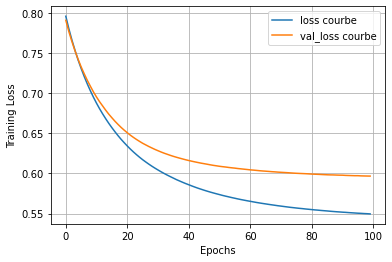

In [401]:
plt.plot(cHist.history['loss'],label="loss courbe")
plt.plot(cHist.history['val_loss'],label="val_loss courbe")
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Training Loss')

Text(0, 0.5, 'Training Accuracy')

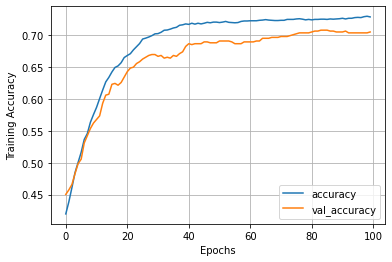

In [402]:
plt.plot(cHist.history['accuracy'],label='accuracy')
plt.plot(cHist.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')

In [403]:
model.evaluate(test, testLabel)

28/28 [==============================] - 0s 443us/step - loss: 0.5753 - accuracy: 0.7022


[0.5752862095832825, 0.7021517753601074]

In [404]:
Preds = model.predict(test)
Preds = Preds.flatten()
PredLabels = []
for arr in Preds:
     PredLabels.append(int(round(arr)))
PredLabelsA = np.array(PredLabels)

In [405]:
print(PredLabelsA[:25])
print(testLabel[:25])

[1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1]


In [406]:
print(classification_report(testLabel, PredLabelsA))

              precision    recall  f1-score   support

           0       0.67      0.52      0.58       357
           1       0.72      0.83      0.77       526

    accuracy                           0.70       883
   macro avg       0.69      0.67      0.68       883
weighted avg       0.70      0.70      0.69       883



Text(33.0, 0.5, 'Truth')

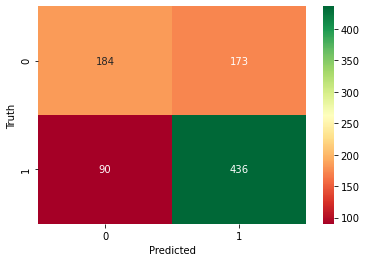

In [407]:
n_conf_mat = tf.math.confusion_matrix(labels=testLabel, predictions=PredLabelsA)

sn.heatmap(n_conf_mat, annot=True, cmap='RdYlGn', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Feature selection

In [3]:
train_f =pd.DataFrame(train)
trainLabel_f =pd.DataFrame(trainLabel)
test_f = pd.DataFrame(test)
testLabel_f =pd.DataFrame(testLabel) 
train_f.columns=['HAEMATOCRIT','HAEMOGLOBINS','ERYTHROCYTE','LEUCOCYTE','THROMBOCYTE','MCH','MCHC','MCV']
test_f.columns=['HAEMATOCRIT','HAEMOGLOBINS','ERYTHROCYTE','LEUCOCYTE','THROMBOCYTE','MCH','MCHC','MCV']

In [425]:
train_f

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV
0,-0.853297,-0.789418,-1.022012,-0.994085,-0.267854,0.548321,0.127762,0.566765
1,1.188849,1.037797,1.350429,0.333050,0.372725,-0.611712,-0.360629,-0.541378
2,0.318426,0.412697,0.266249,0.115162,0.267424,0.136697,0.453355,-0.031049
3,-0.183741,-0.164318,0.138698,0.531130,0.986978,-0.574292,0.046363,-0.701767
4,0.268209,0.701205,0.381045,-0.102726,0.311300,0.398640,1.918527,-0.351827
...,...,...,...,...,...,...,...,...
3524,-1.891109,-1.654941,-1.800071,-0.597926,-2.084289,0.548321,1.023144,0.187664
3525,0.167776,0.124190,0.023903,-0.696965,-0.223979,0.099276,-0.116434,0.202244
3526,-0.987208,-0.981757,-1.481195,-0.300806,-0.610081,1.296730,-0.197832,1.602004
3527,0.837332,0.845459,0.597881,-0.360230,0.179674,0.248958,0.209160,0.231406


* Importance HAEMATOCRIT

In [426]:
valid_data=train_f.copy()
valid_data['HAEMATOCRIT']=np.random.permutation(valid_data['HAEMATOCRIT'])
valid_data.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV
0,-0.585475,-0.789418,-1.022012,-0.994085,-0.267854,0.548321,0.127762,0.566765
1,0.753638,1.037797,1.350429,0.333050,0.372725,-0.611712,-0.360629,-0.541378
2,-0.183741,0.412697,0.266249,0.115162,0.267424,0.136697,0.453355,-0.031049
3,0.937766,-0.164318,0.138698,0.531130,0.986978,-0.574292,0.046363,-0.701767
4,1.054938,0.701205,0.381045,-0.102726,0.311300,0.398640,1.918527,-0.351827


In [427]:
valid_data=np.array(valid_data)


In [428]:
# Fitting the ANN to the Training set
#model.fit(train, trainLabel, batch_size =4, epochs = 50, verbose=2)
cHist = model.fit(valid_data, trainLabel, validation_split=0.2,  batch_size =32, epochs = 100, verbose=2)



Epoch 1/100
89/89 - 0s - loss: 0.7091 - accuracy: 0.5600 - val_loss: 0.7228 - val_accuracy: 0.5142
Epoch 2/100
89/89 - 0s - loss: 0.6967 - accuracy: 0.5749 - val_loss: 0.7123 - val_accuracy: 0.5269
Epoch 3/100
89/89 - 0s - loss: 0.6857 - accuracy: 0.5912 - val_loss: 0.7028 - val_accuracy: 0.5425
Epoch 4/100
89/89 - 0s - loss: 0.6755 - accuracy: 0.6018 - val_loss: 0.6945 - val_accuracy: 0.5538
Epoch 5/100
89/89 - 0s - loss: 0.6665 - accuracy: 0.6188 - val_loss: 0.6867 - val_accuracy: 0.5680
Epoch 6/100
89/89 - 0s - loss: 0.6581 - accuracy: 0.6295 - val_loss: 0.6798 - val_accuracy: 0.5892
Epoch 7/100
89/89 - 0s - loss: 0.6507 - accuracy: 0.6401 - val_loss: 0.6738 - val_accuracy: 0.5963
Epoch 8/100
89/89 - 0s - loss: 0.6440 - accuracy: 0.6468 - val_loss: 0.6685 - val_accuracy: 0.6133
Epoch 9/100
89/89 - 0s - loss: 0.6379 - accuracy: 0.6550 - val_loss: 0.6636 - val_accuracy: 0.6232
Epoch 10/100
89/89 - 0s - loss: 0.6323 - accuracy: 0.6617 - val_loss: 0.6591 - val_accuracy: 0.6317
Epoch 11/

Epoch 84/100
89/89 - 0s - loss: 0.5510 - accuracy: 0.7379 - val_loss: 0.6039 - val_accuracy: 0.7011
Epoch 85/100
89/89 - 0s - loss: 0.5508 - accuracy: 0.7368 - val_loss: 0.6038 - val_accuracy: 0.7011
Epoch 86/100
89/89 - 0s - loss: 0.5505 - accuracy: 0.7357 - val_loss: 0.6035 - val_accuracy: 0.6997
Epoch 87/100
89/89 - 0s - loss: 0.5502 - accuracy: 0.7368 - val_loss: 0.6034 - val_accuracy: 0.7025
Epoch 88/100
89/89 - 0s - loss: 0.5499 - accuracy: 0.7368 - val_loss: 0.6033 - val_accuracy: 0.7025
Epoch 89/100
89/89 - 0s - loss: 0.5497 - accuracy: 0.7375 - val_loss: 0.6032 - val_accuracy: 0.7025
Epoch 90/100
89/89 - 0s - loss: 0.5494 - accuracy: 0.7372 - val_loss: 0.6030 - val_accuracy: 0.7025
Epoch 91/100
89/89 - 0s - loss: 0.5492 - accuracy: 0.7372 - val_loss: 0.6029 - val_accuracy: 0.7025
Epoch 92/100
89/89 - 0s - loss: 0.5490 - accuracy: 0.7375 - val_loss: 0.6026 - val_accuracy: 0.7025
Epoch 93/100
89/89 - 0s - loss: 0.5487 - accuracy: 0.7368 - val_loss: 0.6023 - val_accuracy: 0.7025


In [429]:
model.evaluate(test, testLabel)

28/28 [==============================] - 0s 406us/step - loss: 0.5795 - accuracy: 0.7203


[0.5795404314994812, 0.7202718257904053]

.imp 2

In [430]:
valid_data2=train_f.copy()
valid_data2['HAEMOGLOBINS']=np.random.permutation(valid_data2['HAEMOGLOBINS'])
valid_data2.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV
0,-0.853297,-1.222180,-1.022012,-0.994085,-0.267854,0.548321,0.127762,0.566765
1,1.188849,0.412697,1.350429,0.333050,0.372725,-0.611712,-0.360629,-0.541378
2,0.318426,-1.606857,0.266249,0.115162,0.267424,0.136697,0.453355,-0.031049
3,-0.183741,1.133967,0.138698,0.531130,0.986978,-0.574292,0.046363,-0.701767
4,0.268209,-0.164318,0.381045,-0.102726,0.311300,0.398640,1.918527,-0.351827


In [431]:
valid_data2=np.array(valid_data2)


In [432]:
# Fitting the ANN to the Training set
#model.fit(train, trainLabel, batch_size =4, epochs = 50, verbose=2)
cHist = model.fit(valid_data2, trainLabel, validation_split=0.2,  batch_size =32, epochs = 100, verbose=2)



Epoch 1/100
89/89 - 0s - loss: 0.5521 - accuracy: 0.7365 - val_loss: 0.6115 - val_accuracy: 0.7096
Epoch 2/100
89/89 - 0s - loss: 0.5516 - accuracy: 0.7361 - val_loss: 0.6113 - val_accuracy: 0.7110
Epoch 3/100
89/89 - 0s - loss: 0.5511 - accuracy: 0.7375 - val_loss: 0.6111 - val_accuracy: 0.7125
Epoch 4/100
89/89 - 0s - loss: 0.5507 - accuracy: 0.7389 - val_loss: 0.6108 - val_accuracy: 0.7125
Epoch 5/100
89/89 - 0s - loss: 0.5502 - accuracy: 0.7379 - val_loss: 0.6105 - val_accuracy: 0.7110
Epoch 6/100
89/89 - 0s - loss: 0.5498 - accuracy: 0.7389 - val_loss: 0.6105 - val_accuracy: 0.7125
Epoch 7/100
89/89 - 0s - loss: 0.5494 - accuracy: 0.7400 - val_loss: 0.6102 - val_accuracy: 0.7125
Epoch 8/100
89/89 - 0s - loss: 0.5490 - accuracy: 0.7411 - val_loss: 0.6101 - val_accuracy: 0.7110
Epoch 9/100
89/89 - 0s - loss: 0.5486 - accuracy: 0.7414 - val_loss: 0.6099 - val_accuracy: 0.7125
Epoch 10/100
89/89 - 0s - loss: 0.5483 - accuracy: 0.7421 - val_loss: 0.6096 - val_accuracy: 0.7110
Epoch 11/

Epoch 84/100
89/89 - 0s - loss: 0.5351 - accuracy: 0.7496 - val_loss: 0.6010 - val_accuracy: 0.7082
Epoch 85/100
89/89 - 0s - loss: 0.5350 - accuracy: 0.7506 - val_loss: 0.6008 - val_accuracy: 0.7068
Epoch 86/100
89/89 - 0s - loss: 0.5349 - accuracy: 0.7492 - val_loss: 0.6009 - val_accuracy: 0.7068
Epoch 87/100
89/89 - 0s - loss: 0.5348 - accuracy: 0.7503 - val_loss: 0.6007 - val_accuracy: 0.7068
Epoch 88/100
89/89 - 0s - loss: 0.5348 - accuracy: 0.7503 - val_loss: 0.6007 - val_accuracy: 0.7054
Epoch 89/100
89/89 - 0s - loss: 0.5347 - accuracy: 0.7492 - val_loss: 0.6006 - val_accuracy: 0.7054
Epoch 90/100
89/89 - 0s - loss: 0.5346 - accuracy: 0.7488 - val_loss: 0.6004 - val_accuracy: 0.7054
Epoch 91/100
89/89 - 0s - loss: 0.5345 - accuracy: 0.7492 - val_loss: 0.6004 - val_accuracy: 0.7054
Epoch 92/100
89/89 - 0s - loss: 0.5344 - accuracy: 0.7488 - val_loss: 0.6004 - val_accuracy: 0.7054
Epoch 93/100
89/89 - 0s - loss: 0.5344 - accuracy: 0.7488 - val_loss: 0.6003 - val_accuracy: 0.7054


In [433]:
model.evaluate(test, testLabel)

28/28 [==============================] - 0s 443us/step - loss: 0.5696 - accuracy: 0.7146


[0.5696035623550415, 0.7146092653274536]

In [449]:
valid_data3=train_f.copy()
valid_data3['ERYTHROCYTE']=np.random.permutation(valid_data3['ERYTHROCYTE'])
valid_data3.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV
0,-0.853297,-0.789418,0.776451,-0.994085,-0.267854,0.548321,0.127762,0.566765
1,1.188849,1.037797,0.406555,0.333050,0.372725,-0.611712,-0.360629,-0.541378
2,0.318426,0.412697,1.273899,0.115162,0.267424,0.136697,0.453355,-0.031049
3,-0.183741,-0.164318,1.924407,0.531130,0.986978,-0.574292,0.046363,-0.701767
4,0.268209,0.701205,2.523895,-0.102726,0.311300,0.398640,1.918527,-0.351827


In [450]:
valid_data3=np.array(valid_data3)
# Fitting the ANN to the Training set
#model.fit(train, trainLabel, batch_size =4, epochs = 50, verbose=2)
cHist = model.fit(valid_data3, trainLabel, validation_split=0.2,  batch_size =32, epochs = 100, verbose=2)

model.evaluate(test, testLabel)


Epoch 1/100
89/89 - 0s - loss: 0.6028 - accuracy: 0.6840 - val_loss: 0.6510 - val_accuracy: 0.6360
Epoch 2/100
89/89 - 0s - loss: 0.5970 - accuracy: 0.6900 - val_loss: 0.6451 - val_accuracy: 0.6445
Epoch 3/100
89/89 - 0s - loss: 0.5919 - accuracy: 0.6929 - val_loss: 0.6398 - val_accuracy: 0.6530
Epoch 4/100
89/89 - 0s - loss: 0.5875 - accuracy: 0.6954 - val_loss: 0.6351 - val_accuracy: 0.6586
Epoch 5/100
89/89 - 0s - loss: 0.5837 - accuracy: 0.6985 - val_loss: 0.6314 - val_accuracy: 0.6657
Epoch 6/100
89/89 - 0s - loss: 0.5803 - accuracy: 0.7035 - val_loss: 0.6277 - val_accuracy: 0.6686
Epoch 7/100
89/89 - 0s - loss: 0.5772 - accuracy: 0.7049 - val_loss: 0.6248 - val_accuracy: 0.6756
Epoch 8/100
89/89 - 0s - loss: 0.5744 - accuracy: 0.7095 - val_loss: 0.6219 - val_accuracy: 0.6756
Epoch 9/100
89/89 - 0s - loss: 0.5718 - accuracy: 0.7134 - val_loss: 0.6192 - val_accuracy: 0.6799
Epoch 10/100
89/89 - 0s - loss: 0.5695 - accuracy: 0.7152 - val_loss: 0.6169 - val_accuracy: 0.6827
Epoch 11/

Epoch 84/100
89/89 - 0s - loss: 0.5314 - accuracy: 0.7471 - val_loss: 0.5870 - val_accuracy: 0.7139
Epoch 85/100
89/89 - 0s - loss: 0.5313 - accuracy: 0.7481 - val_loss: 0.5869 - val_accuracy: 0.7139
Epoch 86/100
89/89 - 0s - loss: 0.5312 - accuracy: 0.7467 - val_loss: 0.5869 - val_accuracy: 0.7139
Epoch 87/100
89/89 - 0s - loss: 0.5311 - accuracy: 0.7467 - val_loss: 0.5868 - val_accuracy: 0.7139
Epoch 88/100
89/89 - 0s - loss: 0.5310 - accuracy: 0.7464 - val_loss: 0.5867 - val_accuracy: 0.7139
Epoch 89/100
89/89 - 0s - loss: 0.5309 - accuracy: 0.7460 - val_loss: 0.5866 - val_accuracy: 0.7139
Epoch 90/100
89/89 - 0s - loss: 0.5309 - accuracy: 0.7457 - val_loss: 0.5865 - val_accuracy: 0.7139
Epoch 91/100
89/89 - 0s - loss: 0.5307 - accuracy: 0.7457 - val_loss: 0.5864 - val_accuracy: 0.7139
Epoch 92/100
89/89 - 0s - loss: 0.5306 - accuracy: 0.7460 - val_loss: 0.5864 - val_accuracy: 0.7153
Epoch 93/100
89/89 - 0s - loss: 0.5306 - accuracy: 0.7457 - val_loss: 0.5864 - val_accuracy: 0.7153


[0.5625972151756287, 0.7100792527198792]

In [26]:
valid_data4=train_f.copy()

valid_data4.drop(columns=['HAEMATOCRIT','ERYTHROCYTE','MCHC'],inplace = True)


valid_data4=np.array(valid_data4)
valid_data4

array([[-0.78941821, -0.99408527, -0.26785387,  0.54832137,  0.56676506],
       [ 1.03779727,  0.33304984,  0.37272488, -0.61171221, -0.54137751],
       [ 0.41269724,  0.11516198,  0.26742426,  0.13669656, -0.03104869],
       ...,
       [-0.98175668, -0.30080574, -0.61008087,  1.29673014,  1.60200352],
       [ 0.8454588 , -0.3602297 ,  0.17967375,  0.24895787,  0.23140613],
       [ 0.26844339, -0.69696547,  0.02172283,  0.09927612,  0.49386095]])

In [27]:
test_data4=test_f.copy()
test_data4.drop(columns=['HAEMATOCRIT','ERYTHROCYTE','MCHC'],inplace = True)
test_data4=np.array(test_data4)
test_data4

array([[ 1.61481269, -1.03370124, -1.51391115,  0.54832137,  0.78547741],
       [ 0.17227415,  1.99692072,  0.10947334,  0.09927612,  0.05643625],
       [-1.17409515,  0.33304984, -1.08393364,  0.92252576,  0.15850201],
       ...,
       [ 1.08588189,  0.3924738 , -0.71538148,  1.10962795,  0.69799247],
       [ 0.36461262, -0.59792554, -0.1888784 , -1.32270053, -1.86823243],
       [-1.41451824, -0.30080574, -0.26785387,  1.63351408,  1.70406928]])

In [28]:
model = keras.Sequential()
model.add(keras.Input(shape=(5,)))
# Adding the input layer and the first hidden layer
model.add(keras.layers.Dense(units = 8,  activation = 'relu'
))



# Adding the output layer
model.add(keras.layers.Dense(units = 1, activation = 'sigmoid')) #Pour la fonction de sortie 
#il faut  faire attention


# Compiling the ANN
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=optimizers.Adam(
    learning_rate=0.0001,name='adam'))
cHist = model.fit(valid_data4, trainLabel, validation_split=0.2,  batch_size =32, epochs = 100, verbose=2)




Epoch 1/100
89/89 - 1s - loss: 0.7015 - accuracy: 0.5377 - val_loss: 0.7004 - val_accuracy: 0.5326
Epoch 2/100
89/89 - 0s - loss: 0.6954 - accuracy: 0.5540 - val_loss: 0.6958 - val_accuracy: 0.5382
Epoch 3/100
89/89 - 0s - loss: 0.6897 - accuracy: 0.5664 - val_loss: 0.6916 - val_accuracy: 0.5467
Epoch 4/100
89/89 - 0s - loss: 0.6845 - accuracy: 0.5802 - val_loss: 0.6877 - val_accuracy: 0.5552
Epoch 5/100
89/89 - 0s - loss: 0.6796 - accuracy: 0.5880 - val_loss: 0.6841 - val_accuracy: 0.5722
Epoch 6/100
89/89 - 0s - loss: 0.6750 - accuracy: 0.5955 - val_loss: 0.6807 - val_accuracy: 0.5751
Epoch 7/100
89/89 - 0s - loss: 0.6706 - accuracy: 0.6008 - val_loss: 0.6775 - val_accuracy: 0.5779
Epoch 8/100
89/89 - 0s - loss: 0.6665 - accuracy: 0.6086 - val_loss: 0.6746 - val_accuracy: 0.5807
Epoch 9/100
89/89 - 0s - loss: 0.6625 - accuracy: 0.6128 - val_loss: 0.6718 - val_accuracy: 0.5878
Epoch 10/100
89/89 - 0s - loss: 0.6588 - accuracy: 0.6178 - val_loss: 0.6691 - val_accuracy: 0.5864
Epoch 11/

Epoch 84/100
89/89 - 0s - loss: 0.5609 - accuracy: 0.7375 - val_loss: 0.6078 - val_accuracy: 0.7082
Epoch 85/100
89/89 - 0s - loss: 0.5607 - accuracy: 0.7372 - val_loss: 0.6077 - val_accuracy: 0.7082
Epoch 86/100
89/89 - 0s - loss: 0.5605 - accuracy: 0.7368 - val_loss: 0.6076 - val_accuracy: 0.7082
Epoch 87/100
89/89 - 0s - loss: 0.5602 - accuracy: 0.7365 - val_loss: 0.6075 - val_accuracy: 0.7082
Epoch 88/100
89/89 - 0s - loss: 0.5600 - accuracy: 0.7382 - val_loss: 0.6074 - val_accuracy: 0.7082
Epoch 89/100
89/89 - 0s - loss: 0.5598 - accuracy: 0.7368 - val_loss: 0.6073 - val_accuracy: 0.7096
Epoch 90/100
89/89 - 0s - loss: 0.5596 - accuracy: 0.7372 - val_loss: 0.6072 - val_accuracy: 0.7096
Epoch 91/100
89/89 - 0s - loss: 0.5594 - accuracy: 0.7386 - val_loss: 0.6071 - val_accuracy: 0.7096
Epoch 92/100
89/89 - 0s - loss: 0.5592 - accuracy: 0.7386 - val_loss: 0.6070 - val_accuracy: 0.7096
Epoch 93/100
89/89 - 0s - loss: 0.5590 - accuracy: 0.7393 - val_loss: 0.6070 - val_accuracy: 0.7082


In [29]:
model.evaluate(test_data4, testLabel)

28/28 [==============================] - 0s 443us/step - loss: 0.5858 - accuracy: 0.7112


[0.5857815742492676, 0.7112118005752563]

In [112]:
def create_model(activation='relu'):
    # create model
    model = keras.Sequential()
    model.add( keras.layers.Dense(12, input_dim=8, kernel_initializer='uniform', activation=activation))
    model.add(keras.layers.Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [113]:
# create model

model = keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(train, trainLabel)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.726554 using {'activation': 'relu'}
0.720884 (0.012183) with: {'activation': 'softmax'}
0.711818 (0.011644) with: {'activation': 'softplus'}
0.713234 (0.008463) with: {'activation': 'softsign'}
0.726554 (0.006566) with: {'activation': 'relu'}
0.708701 (0.011376) with: {'activation': 'tanh'}
0.714936 (0.008870) with: {'activation': 'sigmoid'}
0.707571 (0.014141) with: {'activation': 'hard_sigmoid'}
0.712384 (0.010756) with: {'activation': 'linear'}
